### **Importing important libraries**

In [33]:
!pip install catboost

In [34]:
!pip install scikit-learn

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, BaggingClassifier, VotingClassifier)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
!pip install opendatasets
import opendatasets as od

In [37]:
!pip install pandas

In [38]:
od.download("https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv")

Skipping, found downloaded files in "./email-spam-classification-dataset-csv" (use force=True to force download)


In [39]:
data_set = pd.read_csv('email-spam-classification-dataset-csv/emails.csv')

In [40]:
data_set.sample(8)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
2433,Email 2434,5,6,25,2,7,0,73,2,13,...,0,0,0,0,0,0,0,0,0,0
39,Email 40,8,4,1,2,4,1,38,6,0,...,0,0,0,0,0,0,0,2,0,1
2866,Email 2867,2,1,1,3,3,0,36,6,0,...,0,0,0,0,0,0,0,0,0,1
2263,Email 2264,0,2,2,0,3,0,29,0,0,...,0,0,0,0,0,0,0,0,0,0
4154,Email 4155,0,5,2,0,2,0,55,0,0,...,0,0,0,0,0,0,0,0,0,0
3947,Email 3948,3,0,1,1,1,2,33,1,0,...,0,0,0,0,0,0,0,1,0,0
2306,Email 2307,0,0,1,0,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2539,Email 2540,14,24,5,11,12,7,146,9,2,...,0,0,0,1,0,0,1,1,0,1


In [41]:
data_set.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


<ipython-input-42-aed0fa071a89>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Prediction', data=data_set, palette=['#5cb85c', '#d9534f'])   # Create the countplot using Seaborn with color palette for distinction


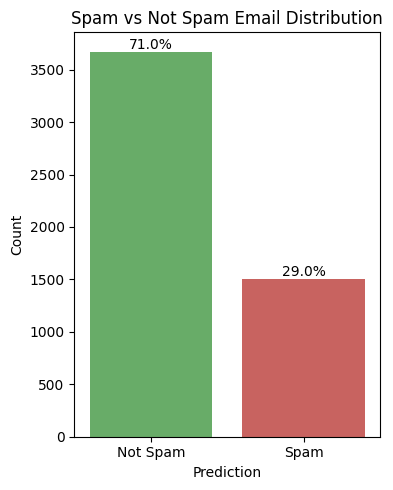

In [42]:
data_set = pd.read_csv('email-spam-classification-dataset-csv/emails.csv')
data_set.sample(8)
data_set.describe()
prediction_counts = data_set['Prediction'].value_counts()
plt.figure(figsize=(4, 5))                                                          # Set up the plot figure size
total = len(data_set['Prediction'])                                                 # Calculate the total number of data points
ax = sns.countplot(x='Prediction', data=data_set, palette=['#5cb85c', '#d9534f'])   # Create the countplot using Seaborn with color palette for distinction
for p in ax.patches:                                                                # Annotate bars with percentages
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.xticks([0, 1], ['Not Spam', 'Spam'])                                             # Customize x-axis labels
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Spam vs Not Spam Email Distribution')

# Display the plot
plt.tight_layout()
plt.show()


In [43]:
data_set.shape

(5172, 3002)

In [44]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


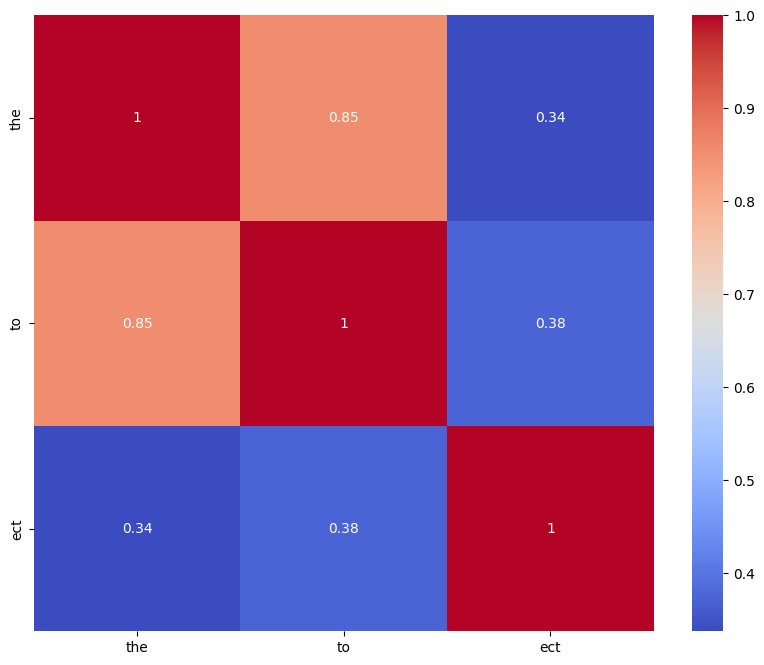

In [45]:
numeric_columns = data_set.select_dtypes(include='number').columns
selected_columns = numeric_columns[:3]
correlation_matrix = data_set[selected_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


### Data separating

In [46]:
start_col = 1
end_col = 3000

X = data_set.iloc[:, start_col:end_col+1]
Y = data_set.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    stratify=Y,
                                                    random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f"Selected Features: Columns {start_col} to {end_col}")
print(f"Training Set Shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test Set Shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Selected Features: Columns 1 to 3000
Training Set Shape: X_train: (4137, 3000), y_train: (4137,)
Test Set Shape: X_test: (1035, 3000), y_test: (1035,)


In [47]:
print(X.iloc[:10,:10])

   the  to  ect  and  for  of    a  you  hou  in
0    0   0    1    0    0   0    2    0    0   0
1    8  13   24    6    6   2  102    1   27  18
2    0   0    1    0    0   0    8    0    0   4
3    0   5   22    0    5   1   51    2   10   1
4    7   6   17    1    5   2   57    0    9   3
5    4   5    1    4    2   3   45    1    0  16
6    5   3    1    3    2   1   37    0    0   9
7    0   2    2    3    1   2   21    6    0   2
8    2   2    3    0    0   1   18    0    0   3
9    4   4   35    0    1   0   49    1   16   9


In [48]:
print(Y[:10])

[0 0 0 0 0 1 0 1 0 0]


### Model testing

In [49]:
def evaluate_model(model_name, X_train, X_test, y_train, y_test):
    model_dict = {
        "GaussianNB": GaussianNB(),
        "SVC": SVC(),
        "LinearSVC": LinearSVC(),
        "RandomForest": RandomForestClassifier(),
        "ExtraTrees": ExtraTreesClassifier(),
        "GradientBoosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Bagging": BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10),
        "Voting": VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('svc', SVC())], voting='hard'),
        "LogisticRegression": LogisticRegression(),
        "XGBClassifier": XGBClassifier(),
        "LGBMClassifier": LGBMClassifier(),
        "CatBoostClassifier": CatBoostClassifier(verbose=0),
        "Perceptron": Perceptron(),
        "SGDClassifier": SGDClassifier(),
        "PassiveAggressive": PassiveAggressiveClassifier(),

    }
    if model_name not in model_dict:
        raise ValueError(f"Invalid model name '{model_name}'. Please select from the following: {list(model_dict.keys())}")
    model = model_dict[model_name]
    if model_name == "MultinomialNB":
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1) * 100
    print(f"{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', cbar=False,
                annot_kws={"size": 12}, linewidths=0.5, linecolor='black')
    plt.title(f'{model_name} Confusion Matrix', fontsize=12)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)
    plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'], fontsize=10)   # Customizing the ticks (if necessary, adapt to actual class labels)
    plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'], fontsize=10)
    plt.grid(False)                                                # Remove gridlines
    plt.tight_layout()
    plt.show()
    return {"Model Name": model_name, "Accuracy": accuracy, "Precision": precision}

### **Cross Validation**

In [50]:
def cross_validate_model(model, X_train, y_train, cv_folds=10):
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=cv_folds)
    cv_mean_accuracy = cross_val_scores.mean() * 100
    return cv_mean_accuracy, cross_val_scores

### **Implimenting of the code**

GaussianNB Performance Metrics:
Accuracy: 93.04%
Precision: 93.41%


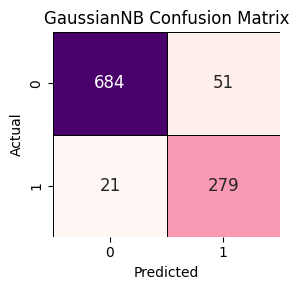

In [53]:
GuassianNB_result = evaluate_model('GaussianNB', X_train, X_test, y_train, y_test)

In [54]:
model = GaussianNB()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"GaussianNB Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")


GaussianNB Cross-Validation Accuracy (mean of 10 folds): 93.21%


SVC Performance Metrics:
Accuracy: 93.04%
Precision: 93.46%


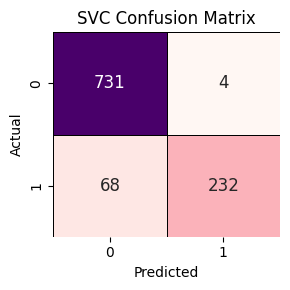

In [55]:
SVC_result = evaluate_model('SVC', X_train, X_test, y_train, y_test)

In [56]:
model = SVC()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"SVC Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")


SVC Cross-Validation Accuracy (mean of 10 folds): 93.11%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC Performance Metrics:
Accuracy: 93.04%
Precision: 93.59%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


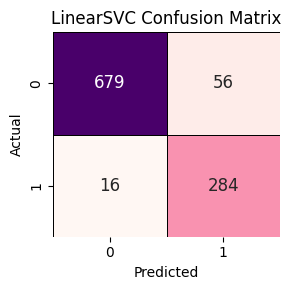

In [60]:
LinearSVC_result = evaluate_model('LinearSVC', X_train, X_test, y_train, y_test)

In [61]:
model = LinearSVC()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"LinearSVC Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppr

LinearSVC Cross-Validation Accuracy (mean of 10 folds): 92.14%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomForest Performance Metrics:
Accuracy: 96.81%
Precision: 96.82%


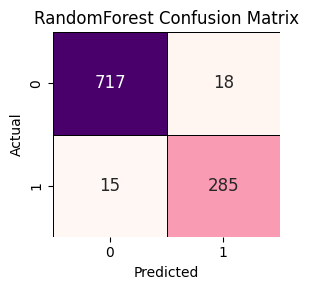

In [66]:
RandomForestClassifier_result = evaluate_model('RandomForest', X_train, X_test, y_train, y_test)

In [67]:
model = RandomForestClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"RandomForestClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")


RandomForestClassifier Cross-Validation Accuracy (mean of 10 folds): 97.39%


ExtraTrees Performance Metrics:
Accuracy: 98.36%
Precision: 98.36%


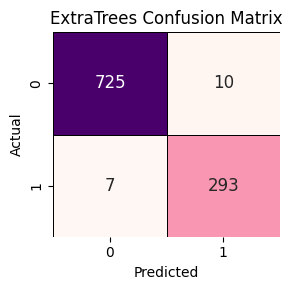

In [69]:
ExtraTreesClassifier_result = evaluate_model('ExtraTrees', X_train, X_test, y_train, y_test)

In [70]:
model = ExtraTreesClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"ExtraTreesClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")


ExtraTreesClassifier Cross-Validation Accuracy (mean of 10 folds): 97.87%


GradientBoosting Performance Metrics:
Accuracy: 96.62%
Precision: 96.61%


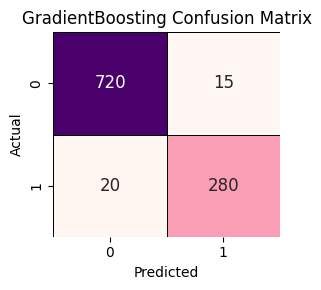

In [72]:
GradientBoostingClassifier_result = evaluate_model('GradientBoosting', X_train, X_test, y_train, y_test)

In [73]:
model = GradientBoostingClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"GradientBoostingClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")


GradientBoostingClassifier Cross-Validation Accuracy (mean of 10 folds): 96.23%


AdaBoost Performance Metrics:
Accuracy: 96.23%
Precision: 96.30%


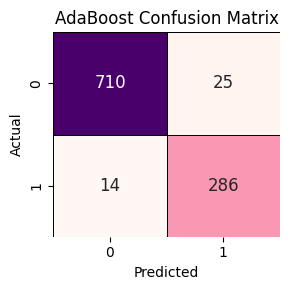

In [75]:
AdaBoostClassifier_result = evaluate_model('AdaBoost', X_train, X_test, y_train, y_test)

In [76]:
model = AdaBoostClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"AdaBoostClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")


AdaBoostClassifier Cross-Validation Accuracy (mean of 10 folds): 95.04%


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Performance Metrics:
Accuracy: 95.56%
Precision: 95.53%


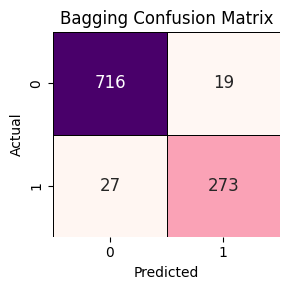

In [78]:
BaggingClassifier_result = evaluate_model('Bagging', X_train, X_test, y_train, y_test)

In [79]:
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"BaggingClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")


BaggingClassifier Cross-Validation Accuracy (mean of 10 folds): 94.97%


Voting Performance Metrics:
Accuracy: 92.66%
Precision: 93.18%


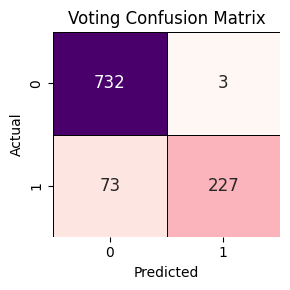

In [81]:
VotingClassifier_result = evaluate_model('Voting',X_train, X_test, y_train, y_test)

In [82]:
model = VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('svc', SVC())], voting='hard')
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"VotingClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")


VotingClassifier Cross-Validation Accuracy (mean of 10 folds): 92.72%


LogisticRegression Performance Metrics:
Accuracy: 97.10%
Precision: 97.17%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


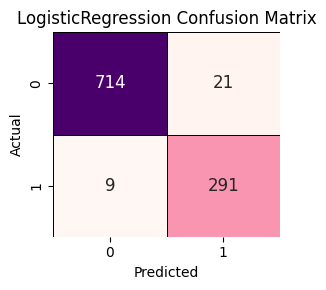

In [85]:
LogisticRegression_result = evaluate_model('LogisticRegression',X_train, X_test, y_train, y_test)

In [86]:
model = LogisticRegression()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"LogisticRegression Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression Cross-Validation Accuracy (mean of 10 folds): 96.88%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier Performance Metrics:
Accuracy: 97.39%
Precision: 97.43%


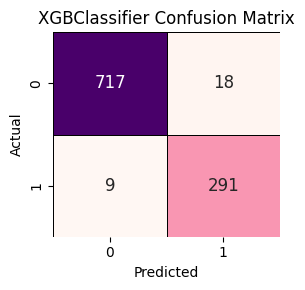

In [88]:
XGBClassifier_result = evaluate_model('XGBClassifier',X_train, X_test, y_train, y_test)

In [89]:
model = XGBClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"XGBClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")


XGBClassifier Cross-Validation Accuracy (mean of 10 folds): 97.29%


[LightGBM] [Info] Number of positive: 1200, number of negative: 2937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.170956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23488
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2574
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290065 -> initscore=-0.895067
[LightGBM] [Info] Start training from score -0.895067
LGBMClassifier Performance Metrics:
Accuracy: 97.97%
Precision: 97.98%


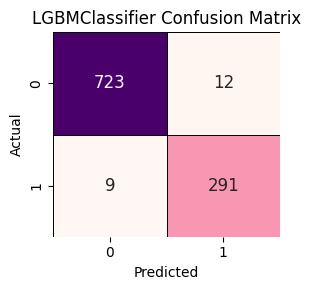

In [91]:
LGBMClassifier_result = evaluate_model('LGBMClassifier',X_train, X_test, y_train, y_test)

In [92]:
model = LGBMClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"LGBMClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")


[LightGBM] [Info] Number of positive: 1080, number of negative: 2643
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.129859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22536
[LightGBM] [Info] Number of data points in the train set: 3723, number of used features: 2471
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290089 -> initscore=-0.894954
[LightGBM] [Info] Start training from score -0.894954
[LightGBM] [Info] Number of positive: 1080, number of negative: 2643
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.297393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22491
[LightGBM] [Info] Number of data points in the train set: 3723, number of used features: 2463
[LightGBM] [Info] 

CatBoostClassifier Performance Metrics:
Accuracy: 98.26%
Precision: 98.27%


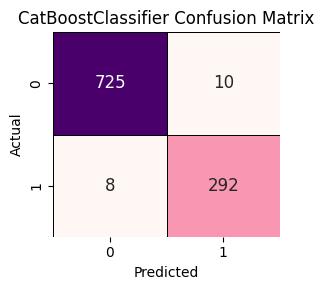

In [94]:
CatBoostClassifier_result = evaluate_model('CatBoostClassifier',X_train, X_test, y_train, y_test)

In [95]:
model = CatBoostClassifier(verbose=0)
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"CatBoostClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")


CatBoostClassifier Cross-Validation Accuracy (mean of 10 folds): 97.68%


Perceptron Performance Metrics:
Accuracy: 95.17%
Precision: 95.20%


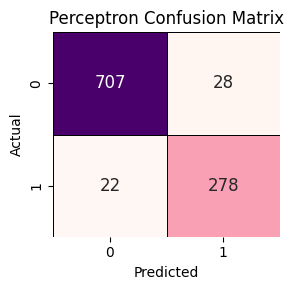

In [97]:
Perceptron_result = evaluate_model('Perceptron',X_train, X_test, y_train, y_test)

In [98]:
model = Perceptron()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"Perceptron Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")


Perceptron Cross-Validation Accuracy (mean of 10 folds): 95.82%


SGDClassifier Performance Metrics:
Accuracy: 95.07%
Precision: 95.14%


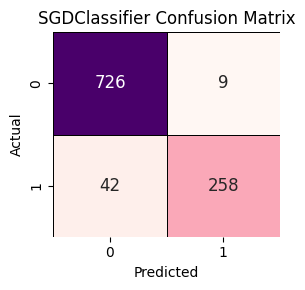

In [101]:
SGDClassifier_result = evaluate_model('SGDClassifier',X_train, X_test, y_train, y_test)

In [102]:
model = SGDClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"SGDClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")


SGDClassifier Cross-Validation Accuracy (mean of 10 folds): 94.59%


PassiveAggressive Performance Metrics:
Accuracy: 94.40%
Precision: 94.94%


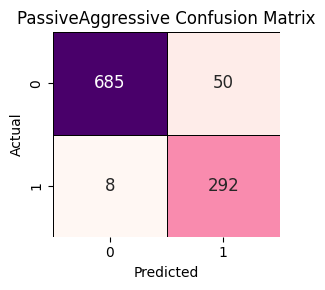

In [110]:
PassiveAggressiveClassifier_result = evaluate_model('PassiveAggressive',X_train, X_test, y_train, y_test)

In [111]:
model = PassiveAggressiveClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"PassiveAggressiveClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

PassiveAggressiveClassifier Cross-Validation Accuracy (mean of 10 folds): 94.13%


### **Displaying the datas in table**

In [120]:


result_summary = pd.DataFrame([GuassianNB_result,
                               SVC_result,
                               LinearSVC_result,
                               RandomForestClassifier_result,
                               ExtraTreesClassifier_result,
                               GradientBoostingClassifier_result,
                               AdaBoostClassifier_result,
                               BaggingClassifier_result,
                               VotingClassifier_result,
                               LogisticRegression_result,
                               XGBClassifier_result,
                               LGBMClassifier_result,
                               CatBoostClassifier_result,
                               Perceptron_result,
                               SGDClassifier_result,
                               PassiveAggressiveClassifier_result])
result_summary



,Model Name,Accuracy,Precision
0,GaussianNB,93.043478,93.405096
1,SVC,93.043478,93.464934
2,LinearSVC,93.043478,93.591050
3,RandomForest,96.811594,96.822874
4,ExtraTrees,98.357488,98.364282
5,GradientBoosting,96.618357,96.606850
6,AdaBoost,96.231884,96.296767
7,Bagging,95.555556,95.533349
8,Voting,92.657005,93.182105
9,LogisticRegression,97.101449,97.165055
